# Linear Regression
 [link of the course](https://openclassrooms.com/en/courses/5873596-design-effective-statistical-models-to-understand-your-data/6229141-build-and-interpret-a-univariate-linear-regression-model)
We will use the advertising dataset which  contains 200 samples with amounts spent on three different media channels: newspaper, radio, and TV 

lets charge the dataset after importing the pandas python library

In [1]:
import pandas as pd
df=pd.read_csv("data/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


##### Our goal here is to be able to adjust advertising budgets to increase sales. In other words, we want to build a model that can tell us how much increase in sales is associated with a given increase in TV, radio, or newspaper advertising.

First let's plot the sales versus others variables

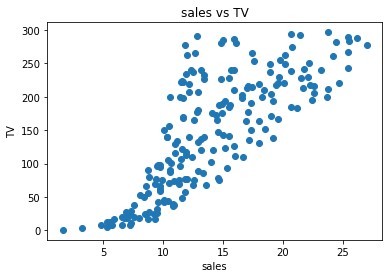

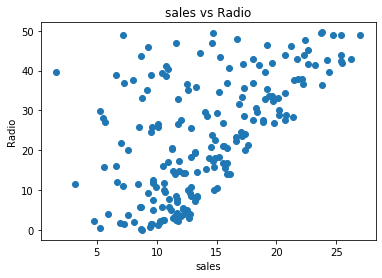

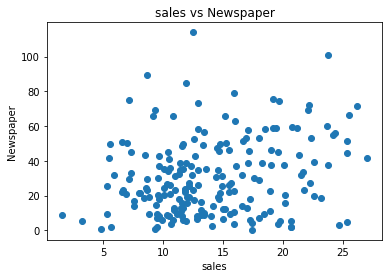

In [2]:
from matplotlib import pyplot as plt
for i in df.keys():
    if i!="Sales":
        plt.scatter(df.Sales,df[i])
        plt.xlabel("sales")
        plt.ylabel(i)
        plt.title("sales vs "+i)
        plt.show()

we can already infer some information from these plots
* as tv and radio spending increase ,so do sales
* news paper spending impact on sales is less pronounced. Althought there is a trend
* It looks like TV spending is more efficient than radio as the overall trend of the plot is steeper( raide en francais)

Lets calculate the correlation to get more information in order to be able to conclude the inference above

In [3]:
df.corr()["Sales"]

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Sales        1.000000
Name: Sales, dtype: float64

The calculation correlation confirm our inference 

##### TV correlates most with sales, followed by radio, and then newspaper


lets start by build a linear regression model between sales and tv which is the most correlated with sales

To do this we must to import the statsmodel python library which allow us to do the model with its method named OLS to refer Ordinar Least Squared

##### Here we go

In [14]:
import statsmodels.api as sm
X=df["TV"]
Y=df["Sales"]
X = sm.add_constant(X) # X become a two dimension matrix
model=sm.OLS(Y,X)
results=model.fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           1.47e-42
Time:                        12:14:51   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's interpret the table above
* const= intercept our b in the linear equation :Y=a*x + b .That's mean the amount of sales you would spect if you spent zero money on TV ads
* Tv=slope=a :That's mean the amount of sales you would spect if you spent on more dollar on TV ads
* std err: the estimate of the variations of each coefficient (the lower it is the better is)
* t: the ratio of the coefficient on the std err
* P>|t|: the p value for each coefficient it test the null hypothesis which is the coefficient is equal to zero <span style="color:blue">In our case the null hypothesis is the TV ads have absolutly no effect on the amount of sales</span>
* R-squared: R-squared is defined as the amount of variation of the target variable which is explained by your model. Always lower than 1 . It is helpfull when we compare differents models


Now after this we can plot the estimated line with the regression coefficient


In [20]:
results.fittevalues=results.params["TV"]*df["TV"] + results.params["const"]
results.fittedvalues

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [23]:
results.resid=df["Sales"]-results.fittevalues
results.resid

0      4.129225
1      1.252026
2      1.449776
3      4.265605
4     -2.727218
         ...   
195   -1.248493
196   -1.810545
197   -2.646579
198    4.986015
199   -4.665848
Length: 200, dtype: float64

Let's add the fited values in the i initial dataFrame

In [24]:
df["fitted"]=results.fittevalues
df

,TV,Radio,Newspaper,Sales,fitted
0,230.1,37.8,69.2,22.1,17.970775
1,44.5,39.3,45.1,10.4,9.147974
2,17.2,45.9,69.3,9.3,7.850224
3,151.5,41.3,58.5,18.5,14.234395
4,180.8,10.8,58.4,12.9,15.627218
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,8.848493
196,94.2,4.9,8.1,9.7,11.510545
197,177.0,9.3,6.4,12.8,15.446579
198,283.6,42.0,66.2,25.5,20.513985


To plot the fitted values versus the real values, we can sort the DataFrame. This is just for plotting convenience.

In [26]:
df.sort_values(by = 'TV', ascending = True, inplace = True)
df

,TV,Radio,Newspaper,Sales,fitted
130,0.7,39.6,8.7,1.6,7.065869
155,4.1,11.6,5.7,3.2,7.227494
78,5.4,29.9,9.4,5.3,7.289291
56,7.3,28.1,41.4,5.5,7.379611
126,7.8,38.9,50.6,6.6,7.403379
...,...,...,...,...,...
98,289.7,42.3,51.2,25.4,20.803958
35,290.7,4.1,8.5,12.8,20.851495
30,292.9,28.3,43.2,21.4,20.956076
42,293.6,27.7,1.8,20.7,20.989351


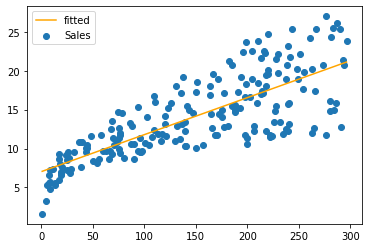

In [30]:
plt.scatter(df.TV,df.Sales,label="Sales")
plt.plot(df.TV,df.fitted,label="fitted",color="orange")
plt.legend()


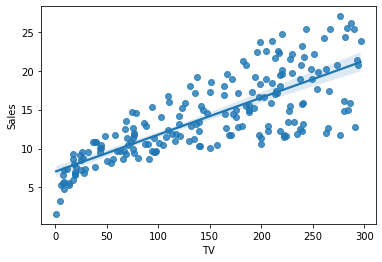

In [33]:
import seaborn as sns
sns.regplot(x=df.TV,y=df.Sales,label="Sales")


This symbolize the power of python the seaborn does the regression model in one line 